In [27]:
from cdo import Cdo
from ecmean.libs.ncfixers import xr_preproc
import xarray as xr
from ecmean.libs.areas import area_cell
from ecmean.libs.support import identify_grid
cdo=Cdo()


Load some file for test from an AMIP experiment

In [ ]:

filein = 'tests/data/amip/output/oifs/amip_atm_cmip6_1m_1990-1990.nc'
xfield = xr.open_mfdataset(filein, preprocess=xr_preproc)
xfield


## Original reduced gaussian grid comparison

Estimate the area from the internal ECmean function. We cannot plot it since this is gaussian reduced.

In [16]:
gridtype = identify_grid(xfield)
print(gridtype)
area = area_cell(xfield, gridtype)
area.sum().values

gaussian_reduced


array(5.099985e+14, dtype=float32)

Then we estimate the area with CDO using the gridarea call. Please note that there are no big differences in the area

In [22]:
areacdo = cdo.gridarea(input = filein, returnXArray = 'cell_area')
areacdo.sum().values

array(5.09998492e+14)

We can try to compare the output. Please note that ECmean method is not "the way", but the differences between the two methods lead to maximum error of 300000 mˆ2, i.e. 3 kmˆ2, which does not seem to be big deal

(array([  209.,   636.,  1551.,  4275., 11000., 14805.,  5343.,  1711.,
          653.,   137.]),
 array([-312761.95443153, -251403.08408375, -190044.21373596,
        -128685.34338818,  -67326.47304039,   -5967.6026926 ,
          55391.26765518,  116750.13800297,  178109.00835075,
         239467.87869854,  300826.74904633]),
 <BarContainer object of 10 artists>)

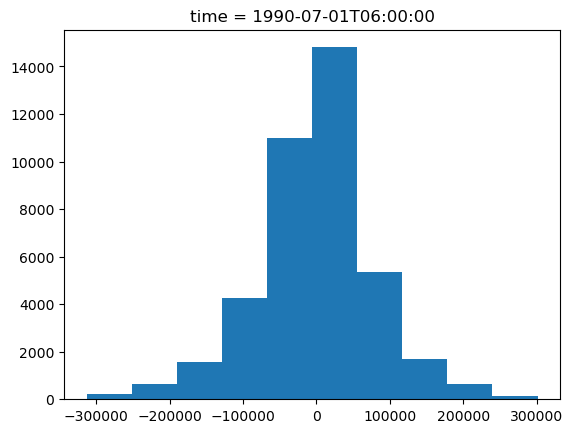

In [26]:
(areacdo-area).plot.hist()

Is CDO recognizing thus the grid correctly? We can check by estimating the mean using the native CDO command, or by computing the mean with or without the weights within python

In [52]:
tas1 = cdo.fldmean(input = '-selname,tas ' + filein, returnXArray = 'tas')
print('fldmean average: ' + str(tas1.values))
tas2 = xfield['tas'].mean()
print('unweighted average: ' + str(tas2.values))
tas3 = xfield['tas'].weighted(area).mean()
print('python Ecmean average: ' + str(tas3.values))
tas4 = xfield['tas'].weighted(areacdo).mean()
print('python CDO average: ' + str(tas4.values))

fldmean average: [[287.71332]]
unweighted average: 288.3467
python Ecmean average: 287.71423
python CDO average: 287.713326504512


Results are clear. Small differences exists at the third decimal place if the ecmean or the cdo method for is used (probably implying an error in the ecmean approach), but an unweighted mean provide completely different results

## Comparison on the gaussian reduced grid

We now treat a file with common apporach of forcing the gridtype to be recognized by CDO. However, in this case we are obliged to move to a regular grid since the grid corners are removed by the GRIB grid - not very clever though! The global area is slightly different in this case.

In [36]:
gridfile = '/home/paolo/ECmean4/tests/data/amip/ICMGGamipINIT'
areacdoregular = cdo.gridarea(input = '-setgridtype,regular -setgrid,'+gridfile+' ' + filein, returnXArray = 'cell_area')
areacdoregular.sum().values
areacdoregular

<xarray.DataArray 'cell_area' (lat: 192, lon: 400)>
array([[1.350633e+08, 1.350633e+08, 1.350633e+08, ..., 1.350633e+08,
        1.350633e+08, 1.350633e+08],
       [2.969416e+08, 2.969416e+08, 2.969416e+08, ..., 2.969416e+08,
        2.969416e+08, 2.969416e+08],
       [4.667642e+08, 4.667642e+08, 4.667642e+08, ..., 4.667642e+08,
        4.667642e+08, 4.667642e+08],
       ...,
       [4.667642e+08, 4.667642e+08, 4.667642e+08, ..., 4.667642e+08,
        4.667642e+08, 4.667642e+08],
       [2.969416e+08, 2.969416e+08, 2.969416e+08, ..., 2.969416e+08,
        2.969416e+08, 2.969416e+08],
       [1.350633e+08, 1.350633e+08, 1.350633e+08, ..., 1.350633e+08,
        1.350633e+08, 1.350633e+08]])
Coordinates:
  * lon      (lon) float64 0.0 0.9 1.8 2.7 3.6 ... 355.5 356.4 357.3 358.2 359.1
  * lat      (lat) float64 89.28 88.36 87.42 86.49 ... -87.42 -88.36 -89.28
Attributes:
    standard_name:     area
    long_name:         area of grid cell
    units:             m2
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  96

As before, we can estimate the area with this approach also with the inner ECmean functions. For praticity, we use the same object provided by CDO. We do not have vertex boundaries in this case, but we need to estimate from gridpoints position!

In [37]:
gridtype = identify_grid(areacdoregular)
print(gridtype)
newarea = area_cell(areacdoregular.to_dataset(name='area_cell'), gridtype)
newarea

gaussian


<xarray.DataArray 'area' (lat: 192, lon: 400)>
array([[1.35063329e+08, 1.35063329e+08, 1.35063329e+08, ...,
        1.35063329e+08, 1.35063329e+08, 1.35063329e+08],
       [2.96941629e+08, 2.96941629e+08, 2.96941629e+08, ...,
        2.96941629e+08, 2.96941629e+08, 2.96941629e+08],
       [4.66764165e+08, 4.66764165e+08, 4.66764165e+08, ...,
        4.66764165e+08, 4.66764165e+08, 4.66764165e+08],
       ...,
       [4.66764165e+08, 4.66764165e+08, 4.66764165e+08, ...,
        4.66764165e+08, 4.66764165e+08, 4.66764165e+08],
       [2.96941629e+08, 2.96941629e+08, 2.96941629e+08, ...,
        2.96941629e+08, 2.96941629e+08, 2.96941629e+08],
       [1.35063329e+08, 1.35063329e+08, 1.35063329e+08, ...,
        1.35063329e+08, 1.35063329e+08, 1.35063329e+08]])
Coordinates:
  * lon      (lon) float64 0.0 0.9 1.8 2.7 3.6 ... 355.5 356.4 357.3 358.2 359.1
  * lat      (lat) float64 89.28 88.36 87.42 86.49 ... -87.42 -88.36 -89.28

With these approach the method are exactly the same, since both approaches extracts the areas from the grid. 

(array([5.6000e+01, 3.6600e+02, 2.5860e+03, 1.1632e+04, 4.3981e+04,
        1.4481e+04, 3.1620e+03, 4.6500e+02, 6.2000e+01, 9.0000e+00]),
 array([-2.08854675e-04, -1.63173676e-04, -1.17492676e-04, -7.18116760e-05,
        -2.61306763e-05,  1.95503235e-05,  6.52313232e-05,  1.10912323e-04,
         1.56593323e-04,  2.02274323e-04,  2.47955322e-04]),
 <BarContainer object of 10 artists>)

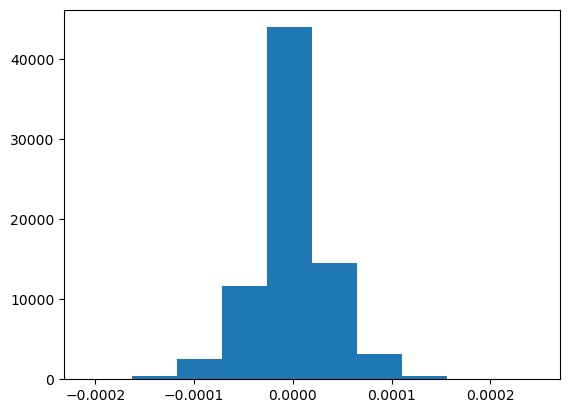

In [38]:
(areacdoregular-newarea).plot.hist()

What about computing the average on the regular grid? We need to initially create a file for this. This can be plotted since it is on almost regular grid

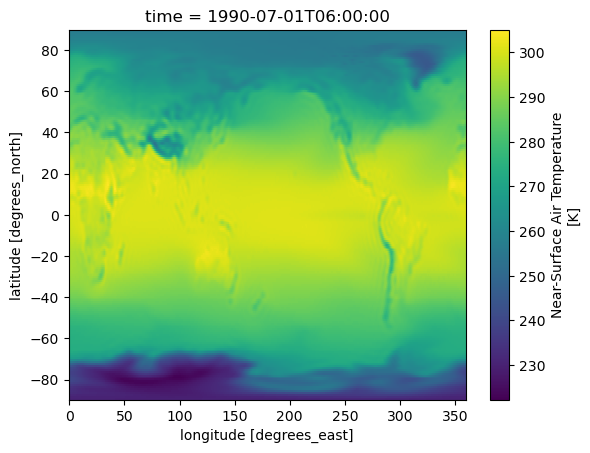

In [61]:
tempfile = cdo.copy(input = '-selname,tas -setgridtype,regular -setgrid,'+gridfile+' ' + filein)
rfield = xr.open_mfdataset(tempfile, preprocess=xr_preproc)
rfield['tas'].plot()

In [62]:
tas1 = cdo.fldmean(input = '-selname,tas ' + tempfile, returnXArray = 'tas')
print('fldmean average: ' + str(tas1.values))
tas2 = rfield['tas'].mean()
print('unweighted average: ' + str(tas2.values))
tas3 = rfield['tas'].weighted(newarea).mean()
print('python Ecmean average: ' + str(tas3.values))
tas4 = rfield['tas'].weighted(areacdoregular).mean()
print('python CDO average: ' + str(tas4.values))

fldmean average: [[[287.709]]]
unweighted average: 279.07123
python Ecmean average: 287.7090072670069
python CDO average: 287.70900726700705


There are very small differences here from CDO and ECmean, which are in line with very small error in area. However, the unweighted mean is way off the target

## Conclusion

There is some internal inconsistency within CDO on the approach to compute the global area, since it is grid dependent. We migth want to rise this issue to the CDO developers: however, in the current CDO version we safely states that unstructured reduced gaussian grid are recognized and the weights are computed based on the grid vertex. Please note that this might also come to some error in the position of the vertices in the Xios definition. 